# Dimensionality Reduction and Unsupervised Learning

## Exercise 34: Building an HCA Model 

In [1]:
#Read file
import pandas as pd

df = pd.read_csv('glass.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      218 non-null    float64
 1   Na      218 non-null    float64
 2   Mg      218 non-null    float64
 3   Al      218 non-null    float64
 4   Si      218 non-null    float64
 5   K       218 non-null    float64
 6   Ca      218 non-null    float64
 7   Ba      218 non-null    float64
 8   Fe      218 non-null    float64
dtypes: float64(9)
memory usage: 15.5 KB


In [3]:
#Remove possible order effects
from sklearn.utils import shuffle

df_shuffled = shuffle(df, random_state=42)

In [4]:
#Transform to Z-scores 
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_shuffled)

In [5]:
#Perform hierarchical clustering using linkage function 
from scipy.cluster.hierarchy import linkage 

model = linkage(scaled_features, method='complete')

## Exercise 35: Plotting an HCA Model and Assigning Predictions 

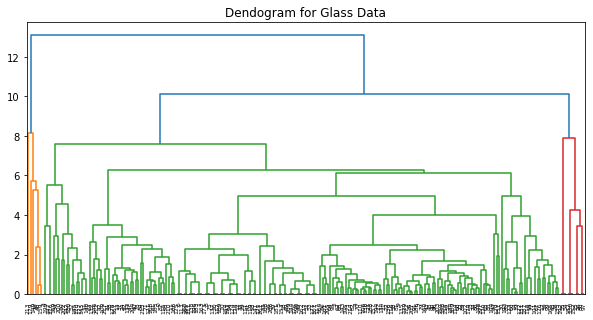

In [7]:
import matplotlib.pyplot as plt 
from scipy.cluster.hierarchy import dendrogram 

plt.figure(figsize=(10,5))
plt.title('Dendogram for Glass Data')
dendrogram(model, leaf_rotation=90, leaf_font_size=6)
plt.show()

In [8]:
from scipy.cluster.hierarchy import fcluster 

labels = fcluster(model, t=9, criterion='distance')

In [19]:
df_shuffled['predicted_cluster'] = labels
df_shuffled.head()

/Users/Max/opt/anaconda3/envs/DataScienceWPython/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,predicted_cluster
100,1.51655,12.75,2.85,1.44,73.27,0.57,8.79,0.11,0.22,2
215,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.00,2
139,1.51674,12.87,3.56,1.64,73.14,0.65,7.99,0.00,0.00,2
178,1.52247,14.86,2.20,2.06,70.26,0.76,9.76,0.00,0.00,2
15,1.51761,12.81,3.54,1.23,73.24,0.58,8.39,0.00,0.00,2


## Exercise 36: Fitting K-Means model and Assigning Predictions 

In [20]:
#Use scaled_features 
from sklearn.cluster import KMeans 

#Instantiating the model 
model = KMeans(n_clusters=2)
#Fitting
model.fit(scaled_features)
#Labels
labels = model.labels_
#Generate freq. table
import pandas as pd 

pd.value_counts(labels)
#Add labels to df 
df_shuffled['predicted_cluster'] = labels 
print(df_shuffled.head())

          RI     Na    Mg    Al     Si     K    Ca    Ba    Fe  \
100  1.51655  12.75  2.85  1.44  73.27  0.57  8.79  0.11  0.22   
215  1.51640  14.37  0.00  2.74  72.85  0.00  9.45  0.54  0.00   
139  1.51674  12.87  3.56  1.64  73.14  0.65  7.99  0.00  0.00   
178  1.52247  14.86  2.20  2.06  70.26  0.76  9.76  0.00  0.00   
15   1.51761  12.81  3.54  1.23  73.24  0.58  8.39  0.00  0.00   

     predicted_cluster  
100                  1  
215                  0  
139                  1  
178                  1  
15                   1  


/Users/Max/opt/anaconda3/envs/DataScienceWPython/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


## Activity 12: Ensemble K-Means Clustering and Calculating Predictions 

In [25]:
#Instantiate DF labels 
labels_df = pd.DataFrame()
for x in range(1,101):
    model = KMeans(n_clusters=2)
    model.fit(scaled_features)
    labels = model.labels_
    labels_df[f'model_{x}_labels'] = labels
 
labels_df['row_mode'] = labels_df.mode(axis=1)

print(labels_df.head())

   model_1_labels  model_2_labels  model_3_labels  model_4_labels  \
0               1               0               0               0   
1               0               1               1               1   
2               1               0               0               0   
3               1               0               0               0   
4               1               0               0               0   

   model_5_labels  model_6_labels  model_7_labels  model_8_labels  \
0               1               0               0               1   
1               0               1               1               0   
2               1               0               0               1   
3               1               0               0               1   
4               1               0               0               1   

   model_9_labels  model_10_labels  ...  model_92_labels  model_93_labels  \
0               0                1  ...                0                0   
1               

## Exercise 37: Calculating Mean Inertia by n_clusters 

In [46]:
from sklearn.cluster import KMeans 
import numpy as np 

mean_inertia_list = []

for x in range(1, 11): # loop through n_clusters 1-10
    inertia_list = [] # create a list for each individual inertia value at n_cluster
    for i in range(100):
        model = KMeans(n_clusters=x) # instantiate model
        model.fit(scaled_features) # fit model
        inertia = model.inertia_ # get inertia
        inertia_list.append(inertia) # append inertia to inertia_list
    # moving to the outside loop
    mean_inertia = np.mean(inertia_list) # get mean of inertia list
    mean_inertia_list.append(mean_inertia) # append mean_inertia to mean_inertia_list
print(mean_inertia_list) 

[1962.0, 1341.1580726861193, 1013.1834695009835, 857.8017485131268, 722.9812754062102, 604.2019310825676, 501.2028950551698, 449.9829593851605, 408.1729204480041, 372.9908048077497]


In [36]:
print(len(mean_inertia_list))

10


## Exercise 38: Plotting Mean Inertia by n_clusters 

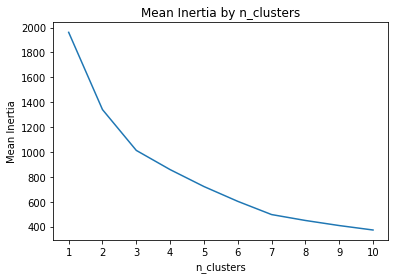

In [38]:
import matplotlib.pyplot as plt 

x = list(range(1, len(mean_inertia_list) + 1))
y = mean_inertia_list

plt.plot(x, y)
plt.title('Mean Inertia by n_clusters')
plt.ylabel('Mean Inertia')
plt.xticks(x)
plt.xlabel('n_clusters')
plt.show()

## Exercise 39: Fitting a PCA Model 

In [39]:
from sklearn.decomposition import PCA 

model = PCA()

In [40]:
#Fit the model
model.fit(scaled_features)
#Explained variance
explained_var_ratio = model.explained_variance_ratio_
print(explained_var_ratio)

[3.53143625e-01 2.50532563e-01 1.25244721e-01 9.69358544e-02
 9.26479607e-02 4.62631534e-02 2.77498886e-02 7.37245537e-03
 1.09779199e-04]


## Exercise 40: Coosing n_components using Threshold of Explained Variance

In [42]:
import numpy as np

cum_sum_explained_var = np.cumsum(explained_var_ratio)
print(cum_sum_explained_var)

[0.35314362 0.60367619 0.72892091 0.82585676 0.91850472 0.96476788
 0.99251777 0.99989022 1.        ]


In [43]:
#Set threshold for the percentage of variance to be kept in the data 
threshold = .95

for i in range(len(cum_sum_explained_var)):
    if cum_sum_explained_var[i] >= threshold:
        best_n_components = i + 1
        break
    else:
        pass

print(f'The best n_components is {best_n_components}')

The best n_components is 6


## Activity 13: Evaluating Mean Inertia by Cluser after PCA Transformation

In [55]:
#Instantiate second PCA Model
PCA_model = PCA(n_components = best_n_components)

df_pca = PCA_model.fit_transform(scaled_features)

mean_inertia_list_PCA = []

for x in range(1, 11): # loop through n_clusters 1-10
    inertia_list = [] # create a list for each individual inertia value at n_cluster
    for i in range(100):
        model = KMeans(n_clusters=x) # instantiate model
        model.fit(df_pca) # fit model
        inertia = model.inertia_ # get inertia
        inertia_list.append(inertia) # append inertia to inertia_list
    # moving to the outside loop
    mean_inertia_PCA = np.mean(inertia_list) # get mean of inertia list
    mean_inertia_list_PCA.append(mean_inertia_PCA) # append mean_inertia to mean_inertia_list

In [56]:
print(mean_inertia_list, '\n', mean_inertia_list_PCA)

[1962.0, 1341.1580726861193, 1013.1834695009835, 857.8017485131268, 722.9812754062102, 604.2019310825676, 501.2028950551698, 449.9829593851605, 408.1729204480041, 372.9908048077497] 
 [1892.8745743658674, 1272.0670934032587, 945.9585011131073, 793.3556249374092, 660.0023797514935, 543.5816413196146, 447.16056350885765, 402.1823386963843, 362.8893887551739, 330.00270535531143]


## Exercise 41: Visual comparison of Inertia

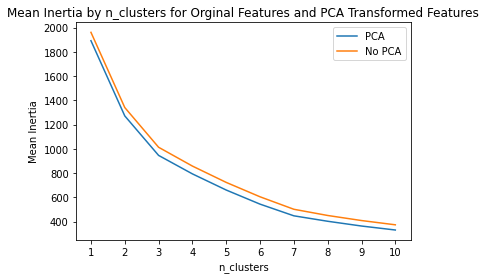

In [59]:
import matplotlib.pyplot as plt 

x = list(range(1, len(mean_inertia_list_PCA)+1))
y = mean_inertia_list_PCA
y2 = mean_inertia_list

plt.plot(x, y, label='PCA')
plt.plot(x, y2, label='No PCA')
plt.title('Mean Inertia by n_clusters for Orginal Features and PCA Transformed Features')
plt.xlabel('n_clusters')
plt.ylabel('Mean Inertia')
plt.xticks(x)
plt.legend()
plt.show()

## Exercise 42: Fitting LDA Model 

In [1]:
import pandas as pd 
df = pd.read_csv('glass_w_outcome.csv')
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [2]:
from sklearn.utils import shuffle
df_shuffled = shuffle(df, random_state=42)

DV = ['Type']

X = df_shuffled.drop(DV, axis = 1)
y = df_shuffled[DV]

#Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
#Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

model = LinearDiscriminantAnalysis()
model.fit(X_train_scaled, y_train)
model.explained_variance_ratio_

/Users/Max/opt/anaconda3/envs/DataScienceWPython/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array([0.95863843, 0.04136157])

## Exercise 43: Using LDA Transformed Components in Classification Model

In [6]:
X_train_LDA = model.transform(X_train_scaled)
X_test_LDA = model.transform(X_test_scaled)

from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train_LDA, y_train)

/Users/Max/opt/anaconda3/envs/DataScienceWPython/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier()

In [14]:
#Get Predicition
predictions = model_rf.predict(X_test_LDA)

from sklearn.metrics import confusion_matrix 
import pandas as pd
import numpy as np

cm = pd.DataFrame(confusion_matrix(y_test, predictions))
cm['Total'] = np.sum(cm, axis = 1)
cm = cm.append(np.sum(cm, axis=0), ignore_index=True)

cm.columns = ['Predicted 1', 'Predicted 2', 'Predicted 3', 'Total']
cm = cm.set_index([['Actual 1', 'Actual 2', 'Actual 3', 'Total']])
print(cm)

          Predicted 1  Predicted 2  Predicted 3  Total
Actual 1           15            7            0     22
Actual 2            4           17            2     23
Actual 3            2            1           24     27
Total              21           25           26     72
